# Paso 1: Cargar el Dataset en Python
- **Primero, necesitamos cargar los datos en Python usando pandas:**

In [2]:
import pandas as pd

df = pd.read_csv("dataset_seguidor_3.csv")

# Mostrar primeras filas
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   s_i_p  s_c_p  s_d_p  s_i  s_c  s_d  accion
0      0      0      0    0    0    0       0
1      0      0      0    0    0    1       2
2      0      0      0    0    1    0       5
3      0      0      0    0    1    1       4
4      0      0      0    1    0    0       8


# Paso 2: Exploración y Análisis de Datos

## Vamos a analizar la distribución de las clases y características

**Este análisis en teoría nos mostrará:**

- Cuántas muestras tenemos para cada acción
- Si hay desbalance en las clases
- Las estadísticas básicas de cada columna


           s_i_p      s_c_p      s_d_p        s_i        s_c        s_d  \
count  64.000000  64.000000  64.000000  64.000000  64.000000  64.000000   
mean    0.500000   0.500000   0.500000   0.500000   0.500000   0.500000   
std     0.503953   0.503953   0.503953   0.503953   0.503953   0.503953   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.500000   0.500000   0.500000   0.500000   0.500000   0.500000   
75%     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

          accion  
count  64.000000  
mean    7.921875  
std     2.998966  
min     0.000000  
25%     6.000000  
50%    10.000000  
75%    10.000000  
max    10.000000  

Distribución de acciones:
accion
10    39
6      7
4      5
5      3
0      2
2      2
8      2
1      1
3      1
9      1
7      1
Name: count, dtype: 

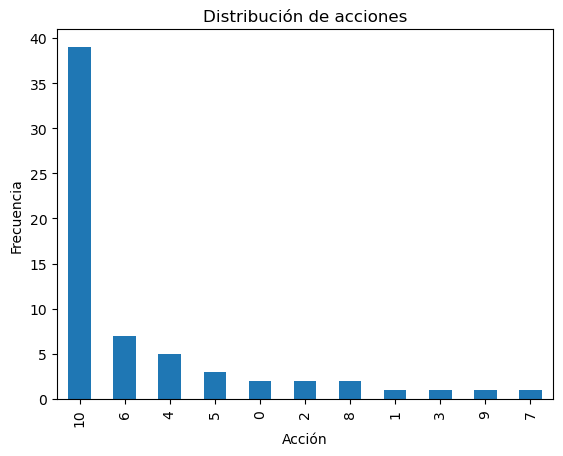

In [4]:
import matplotlib.pyplot as plt

# Resumen estadístico
print(df.describe())

# Distribución de las clases (acciones)
print("\nDistribución de acciones:")
print(df['accion'].value_counts())

# Gráfico de distribución de acciones
df['accion'].value_counts().plot(kind='bar')
plt.title('Distribución de acciones')
plt.xlabel('Acción')
plt.ylabel('Frecuencia')
plt.show()

# Paso 3: Entrenamiento del Modelo de Árbol de Decisión
- **Ahora prepararemos los datos y entrenaremos el modelo:**

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar características (X) y etiquetas (y)
X = df.drop('accion', axis=1)
y = df['accion']

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("\nPrecisión general:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, zero_division=0))



Precisión general: 0.46153846153846156

Matriz de confusión:
 [[0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 0 1 1 0 0 6]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.60      0.75      0.67         8

    accuracy                           0.46        13
   macro avg       0.09      0.11      0.10        13
weighted avg       0.37      0.46      0.41        13



# Paso 4: Visualización del Árbol de Decisión
- **Para entender mejor el modelo, podemos visualizarlo:**


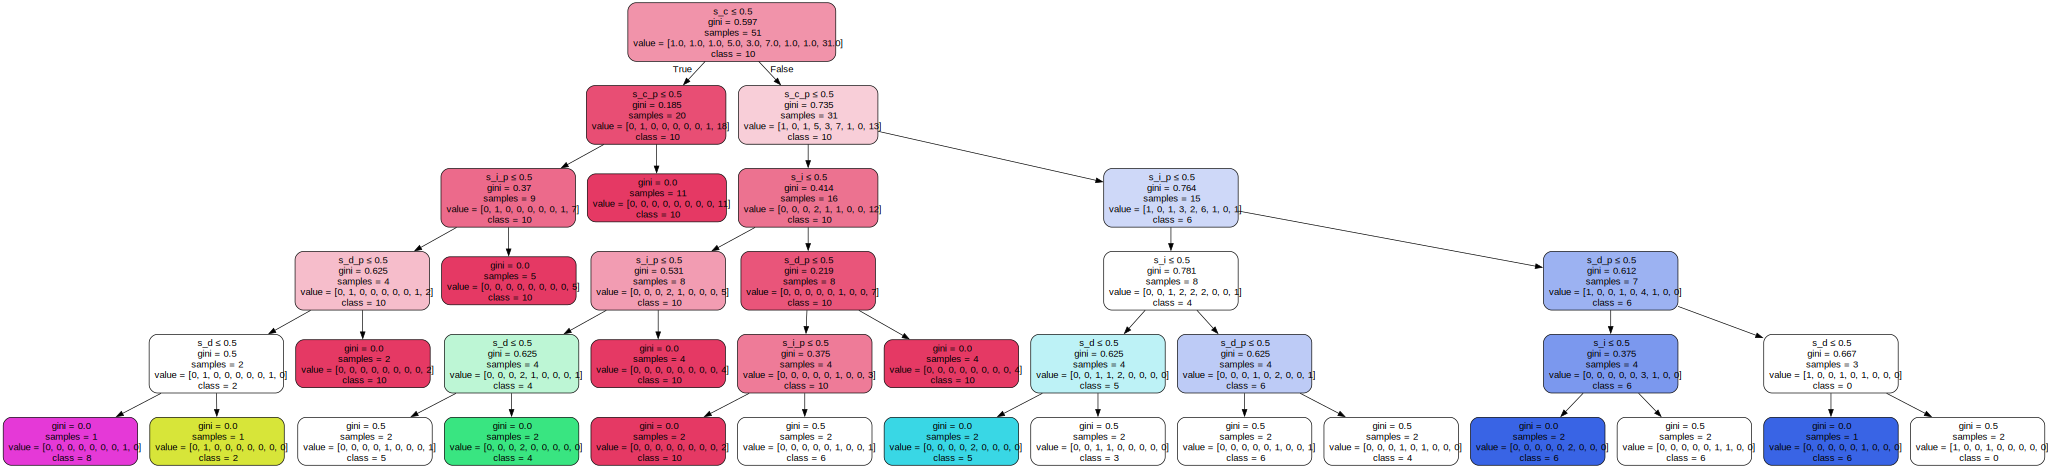


Reglas del árbol:
 |--- s_c <= 0.50
|   |--- s_c_p <= 0.50
|   |   |--- s_i_p <= 0.50
|   |   |   |--- s_d_p <= 0.50
|   |   |   |   |--- s_d <= 0.50
|   |   |   |   |   |--- class: 8
|   |   |   |   |--- s_d >  0.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- s_d_p >  0.50
|   |   |   |   |--- class: 10
|   |   |--- s_i_p >  0.50
|   |   |   |--- class: 10
|   |--- s_c_p >  0.50
|   |   |--- class: 10
|--- s_c >  0.50
|   |--- s_c_p <= 0.50
|   |   |--- s_i <= 0.50
|   |   |   |--- s_i_p <= 0.50
|   |   |   |   |--- s_d <= 0.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- s_d >  0.50
|   |   |   |   |   |--- class: 4
|   |   |   |--- s_i_p >  0.50
|   |   |   |   |--- class: 10
|   |   |--- s_i >  0.50
|   |   |   |--- s_d_p <= 0.50
|   |   |   |   |--- s_i_p <= 0.50
|   |   |   |   |   |--- class: 10
|   |   |   |   |--- s_i_p >  0.50
|   |   |   |   |   |--- class: 6
|   |   |   |--- s_d_p >  0.50
|   |   |   |   |--- class: 10
|   |--- s_c_p >  0.50
|   |   |--- s

In [8]:
import os

# Forzar path al ejecutable correcto
os.environ["PATH"] = r"C:\Program Files\Graphviz\bin" + os.pathsep + os.environ["PATH"]

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=[str(i) for i in model.classes_],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)

# Exportar a texto plano
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=list(X.columns))
print("\nReglas del árbol:\n", tree_rules)
